In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
properties = pd.read_csv("../data/raw/property_data.csv", index_col=0)
income = pd.read_csv("../data/raw/external/vic_income.csv", index_col=0)
properties.head()

,Name,Cost,Coordinates,Bed,Bath,Parking,Property_Type,Agency,Postcode
0,708/228 A'BECKETT STREET Melbourne VIC 3000,500,"[-37.8101911, 144.9566043]",2,1,−,Apartment / Unit / Flat,Elite Real Estate,3000.0
1,4/180 Little Collins Street Melbourne VIC 3000,500,"[-37.8138601, 144.9679067]",1,1,−,Apartment / Unit / Flat,Dingle Partners,3000.0
2,1605/565 Flinders Street Melbourne VIC 3000,500,"[-37.8210586, 144.9559072]",2,2,1,Apartment / Unit / Flat,Dingle Partners,3000.0
3,612/408 Lonsdale Street Melbourne VIC 3000,350,"[-37.8125979, 144.9604012]",1,1,−,Apartment / Unit / Flat,Gotham Property,3000.0
4,2108/288 Spencer Street Melbourne VIC 3000,350,"[-37.813775, 144.9520948]",1,1,−,Apartment / Unit / Flat,Motion Property,3000.0


## Preprocessing
- 1 property_type is actually a Carspace
- No bathrooms actually have 1 bathroom

In [92]:
nan_bed = properties[properties['Bed'] == '−']
nan_bath = properties[properties['Bath'] == '−']
nan_park = properties[properties['Parking'] == '−']
nan_postcode = properties[properties['Postcode'].isna()]
print(len(nan_bed))
print(len(nan_bath))
print(len(nan_park))
print(len(nan_postcode))

45
4
866
24


In [93]:
# reformat costs without commas
properties['Cost'] = properties['Cost'].str.replace(',', '')

# change null values to numeric zero
properties['Bed'] = properties['Bed'].replace('−', 0)
properties['Bath'] = properties['Bath'].replace('−', 1)
properties['Parking'] = properties['Parking'].replace('−', 0)

In [94]:
# find row/s with invalid costs and remove
space_count = properties['Cost'].str.count(' ')
invalid_rows = space_count[space_count != 0]
invalid_row = invalid_rows.index[0]
properties = properties[properties.index != invalid_row]

# zero cost properties
properties = properties[properties['Cost'] != 0]

# Null postcodes are invalid rows
properties = properties[~properties['Postcode'].isna() ]

In [99]:
# Convert cost to float type
properties['Cost'] = properties['Cost'].astype(float)
properties['Bed'] = properties['Bed'].astype(int)
properties['Bath'] = properties['Bath'].astype(int)
properties['Parking'] = properties['Parking'].astype(int)
properties['Postcode'] = properties['Postcode'].astype(int).astype(str)

properties.head()

,Name,Cost,Coordinates,Bed,Bath,Parking,Property_Type,Agency,Postcode
0,708/228 A'BECKETT STREET Melbourne VIC 3000,500.0,"[-37.8101911, 144.9566043]",2,1,0,Apartment / Unit / Flat,Elite Real Estate,3000
1,4/180 Little Collins Street Melbourne VIC 3000,500.0,"[-37.8138601, 144.9679067]",1,1,0,Apartment / Unit / Flat,Dingle Partners,3000
2,1605/565 Flinders Street Melbourne VIC 3000,500.0,"[-37.8210586, 144.9559072]",2,2,1,Apartment / Unit / Flat,Dingle Partners,3000
3,612/408 Lonsdale Street Melbourne VIC 3000,350.0,"[-37.8125979, 144.9604012]",1,1,0,Apartment / Unit / Flat,Gotham Property,3000
4,2108/288 Spencer Street Melbourne VIC 3000,350.0,"[-37.813775, 144.9520948]",1,1,0,Apartment / Unit / Flat,Motion Property,3000


(array([2.220e+02, 1.200e+01, 1.120e+02, 4.250e+02, 1.474e+03, 2.108e+03,
        1.349e+03, 6.360e+02, 4.360e+02, 2.110e+02, 1.380e+02, 9.300e+01,
        5.900e+01, 4.600e+01, 2.000e+01, 2.800e+01, 2.300e+01, 1.500e+01,
        2.700e+01, 5.000e+00, 1.300e+01, 1.100e+01, 6.000e+00, 5.000e+00,
        6.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 1.000e+01, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([   0.,   80.,  160.,  240.,  320.,  400.,  480.,  560.,  640.,
         720.,  800.,  880.,  960., 1040., 1120., 1200., 1280., 1360.,
        1440., 1520., 1600., 1680., 1760., 1840., 1920., 2000., 2080.,
        2160., 2240., 2320., 2400., 2480., 2560., 2640., 2720., 2800.,
        2880., 2960., 3040., 3120., 3200., 3280., 3360., 3440., 3520.,
        3600., 3680.,

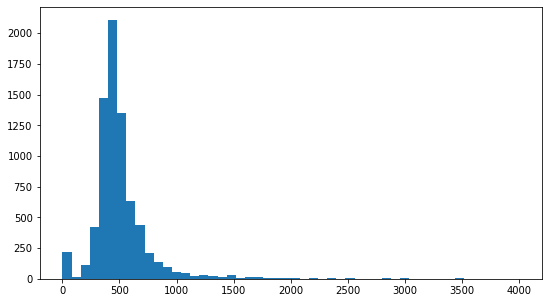

In [102]:
# Rental Cost Distribution
plt.figure(figsize = (9, 5))
plt.hist(properties['Cost'], range=(0, 4000), bins=50)

<AxesSubplot:>

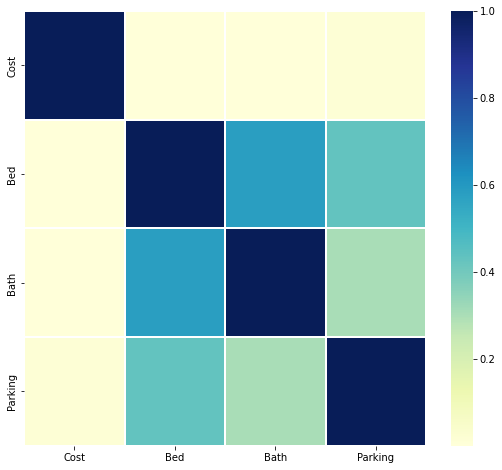

In [100]:
corrmat = properties.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [101]:
properties.to_csv('../data/curated/properties_processed.csv')